In [1]:
#импорт библиотек
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os  

In [2]:
#variables
data='brl'

#импорт данных, сделать циклом
data = pd.read_csv(data+'/all_data.csv', sep=',')


In [3]:
#конвертация данных
data['Date'] = pd.to_datetime(data['Date'], dayfirst=False)


In [4]:
drop_data = data.copy()

In [5]:
#удаление пустых строчек
drop_data = drop_data.dropna(how='all')

In [6]:
#удаление пропусков спота из-за выходных и праздников
drop_data = drop_data.dropna(subset=['USDBRL Curncy'])


In [7]:
#добавление предыдущих значений признаков в пустые места
for col in drop_data.select_dtypes(include=['int', 'float']):
    while drop_data[col].isnull().any(): 
        # Вычисляем скользящее среднее, игнорируя пропущенные значения
        drop_data[col] = drop_data[col].fillna(method='ffill')


In [8]:
#вычисление таргета

drop_data['target'] = (drop_data['USDBRL Curncy'].shift(1) - (drop_data['USDBRL Curncy'] + (drop_data['BCN1W BGN Curncy'] / 50000))) / drop_data['USDBRL Curncy'].shift(1)

#перенос последнего столбца на 4-тое место
new_columns = drop_data.columns[:-1].to_list()
new_columns.insert(1, 'target')
t_data_0 = drop_data[new_columns]
#удаление 'USDBRL Curncy' и 'BCN1W BGN Curncy' 
t_data = t_data_0.copy()
t_data.drop(['USDBRL Curncy', 'BCN1W BGN Curncy'], axis=1, inplace=True)
t_data.drop(0, axis=0, inplace=True)

In [9]:
t_data

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
1,2007-02-02,-0.002095,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,54240.0,...,84.960,93.119,39.825,5.9750,461.25,402.00,118.35,2.5953,2.4049,58.5
2,2007-02-05,0.004990,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,52360.0,...,85.080,93.125,39.500,5.7500,458.50,402.00,116.60,2.5875,2.3990,61.3
3,2007-02-06,0.003296,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,52570.0,...,84.770,91.151,39.510,5.8500,451.00,396.50,116.50,2.5513,2.3695,60.4
4,2007-02-07,-0.003404,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,53540.0,...,84.710,90.119,39.396,5.8500,452.00,392.25,116.85,2.5488,2.3596,60.4
5,2007-02-08,-0.000435,1.3042,1.9589,121.03,10.9502,5.1472,5.0974,59.03,52950.0,...,84.690,92.613,40.338,5.8750,457.00,399.75,115.55,2.5346,2.3455,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,2021-12-27,0.007824,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,69630.0,...,96.093,208.000,91.500,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3888,2021-12-28,0.000589,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,70220.0,...,96.202,206.000,92.500,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3889,2021-12-29,-0.011917,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,70050.0,...,95.929,207.000,91.500,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0
3890,2021-12-30,0.021418,1.1325,1.3499,115.08,20.4626,0.7307,1.3177,79.32,69920.0,...,95.968,205.000,90.500,5.4900,779.75,596.00,228.85,2.4431,2.6129,20.0


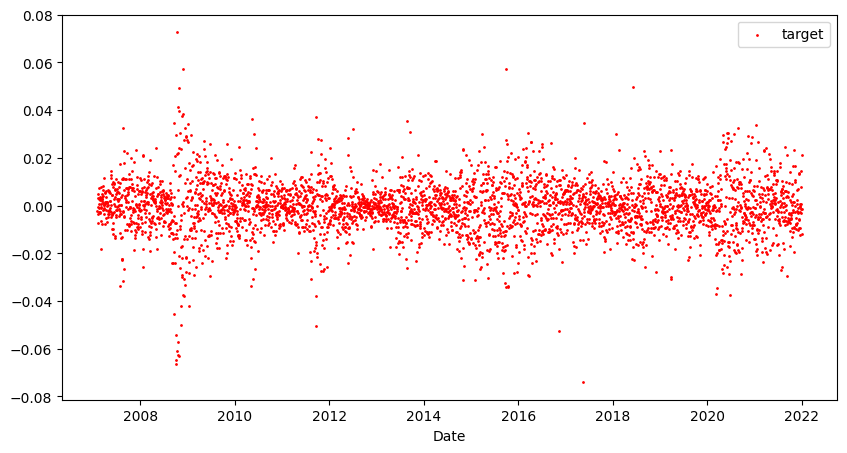

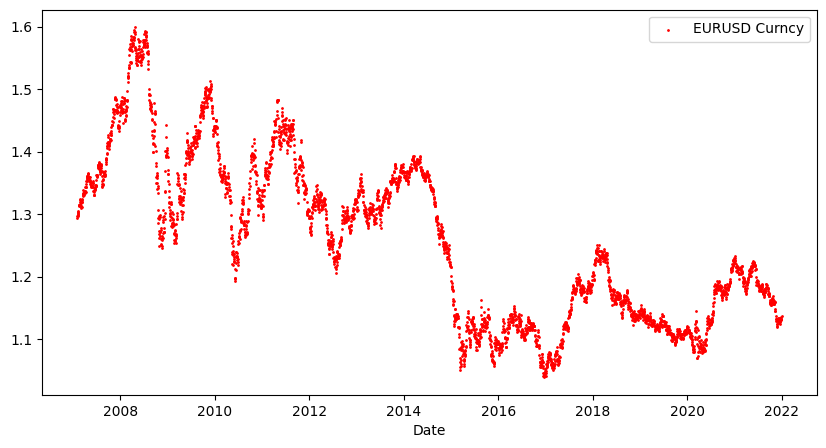

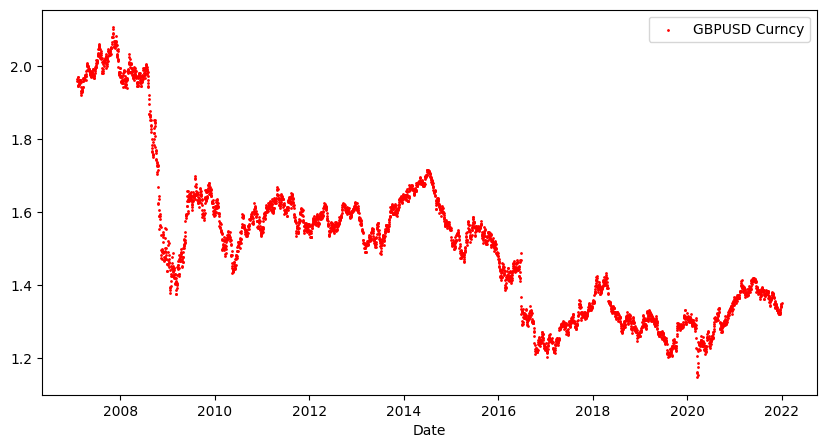

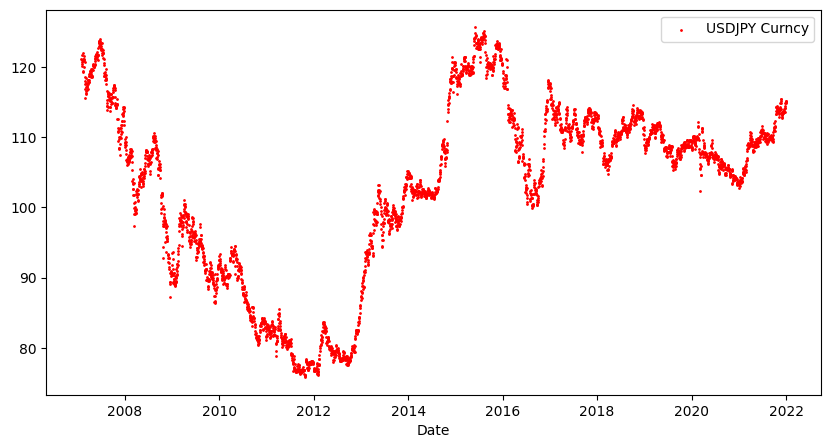

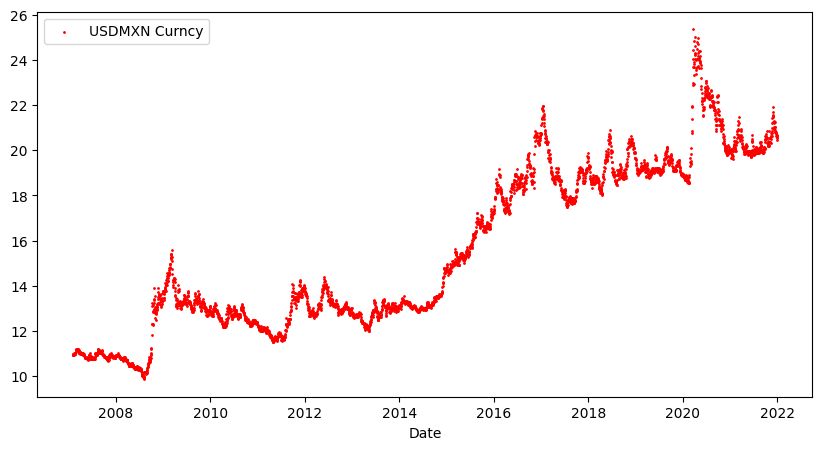

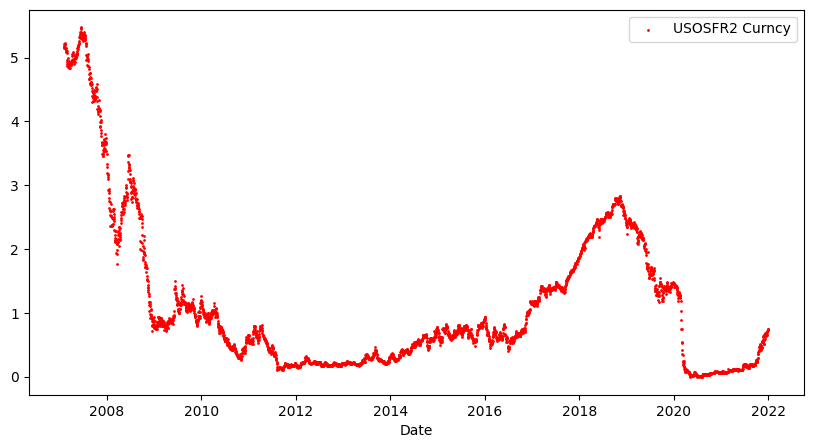

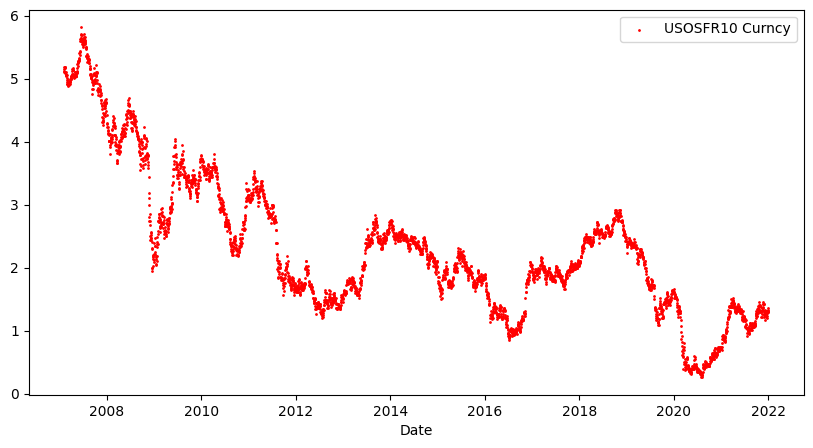

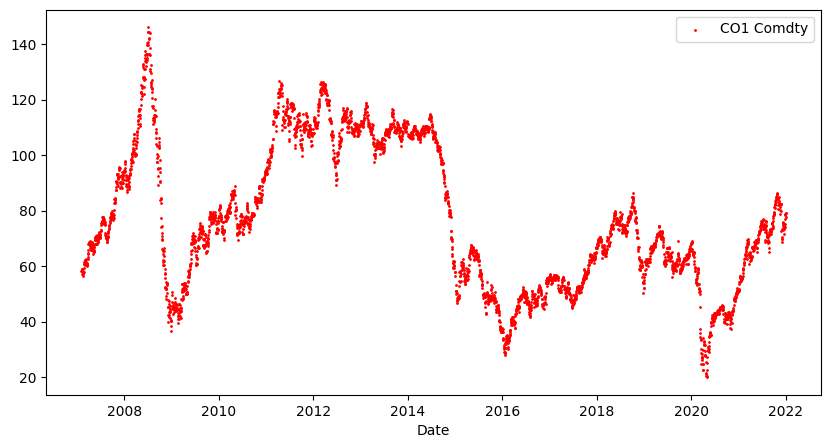

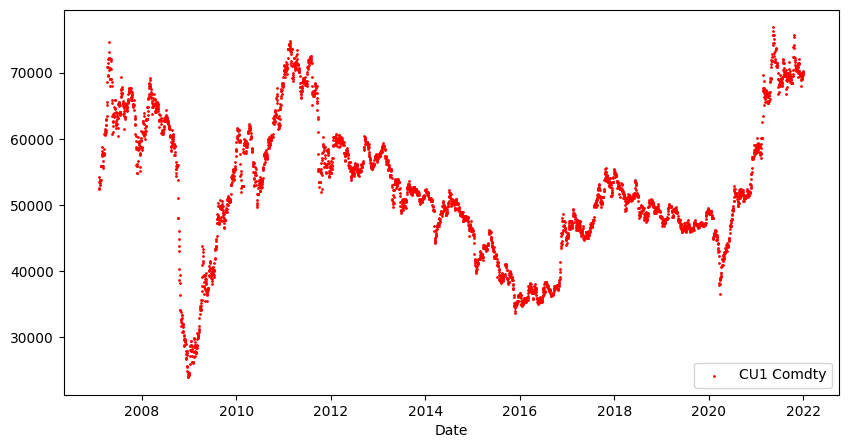

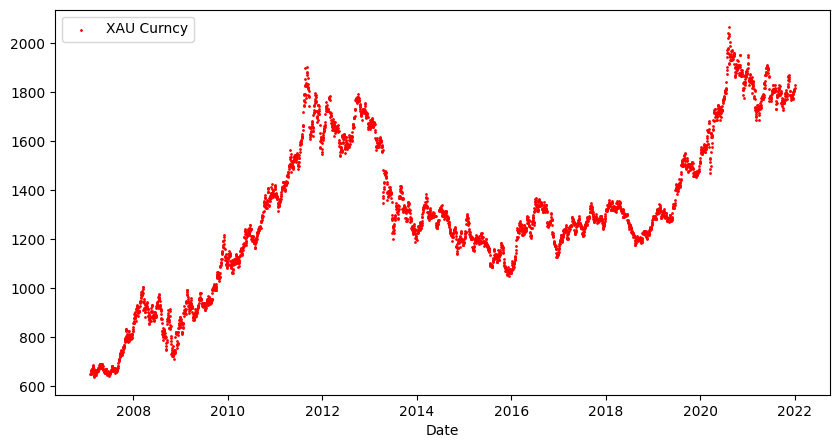

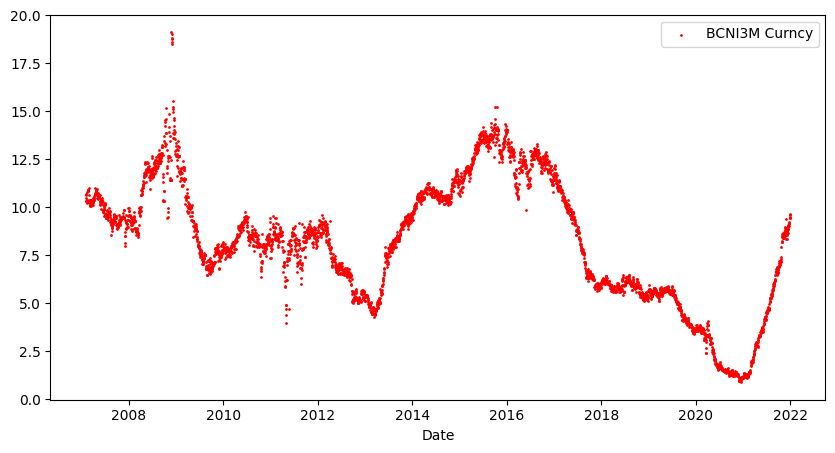

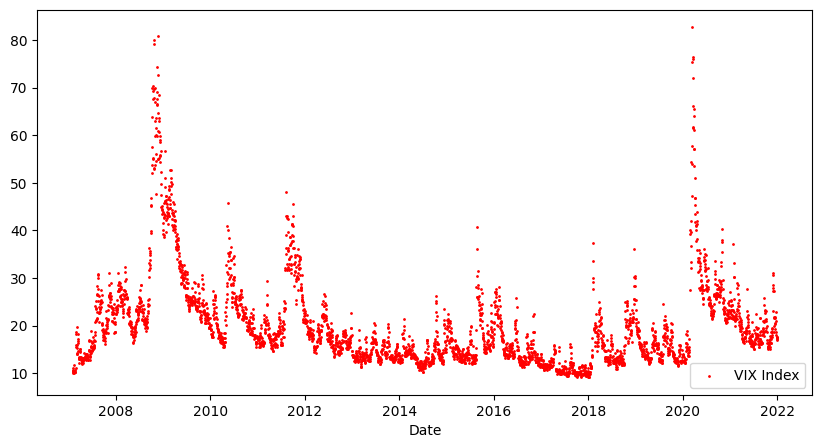

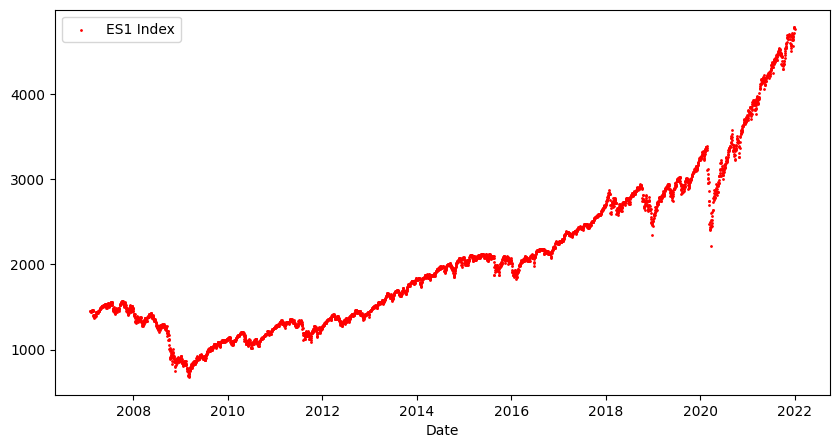

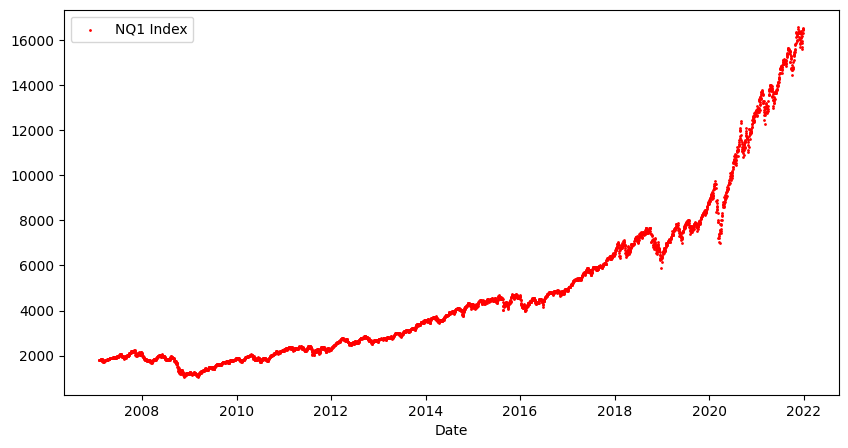

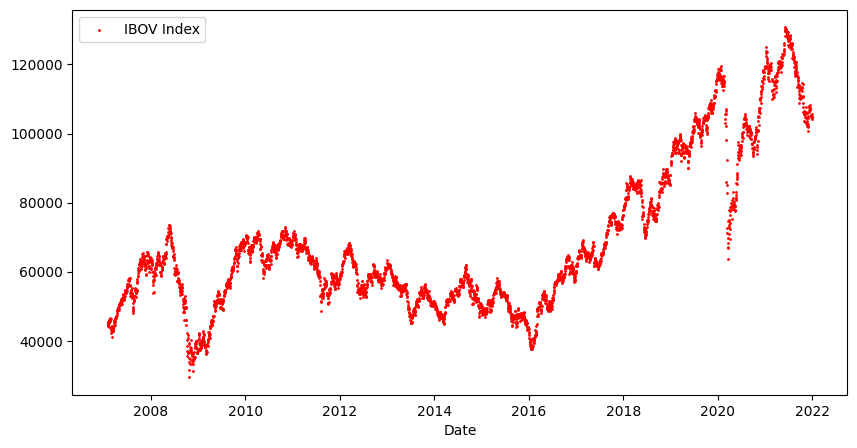

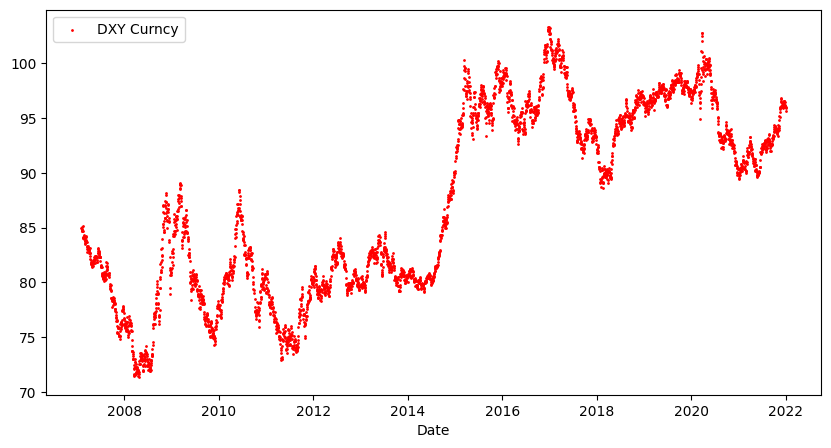

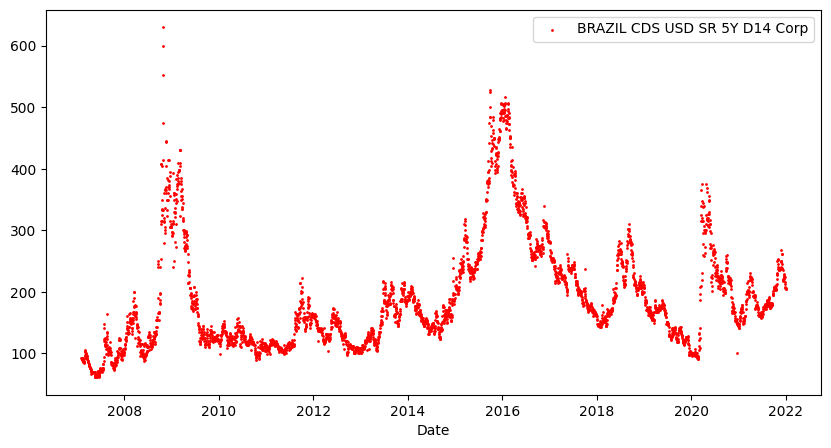

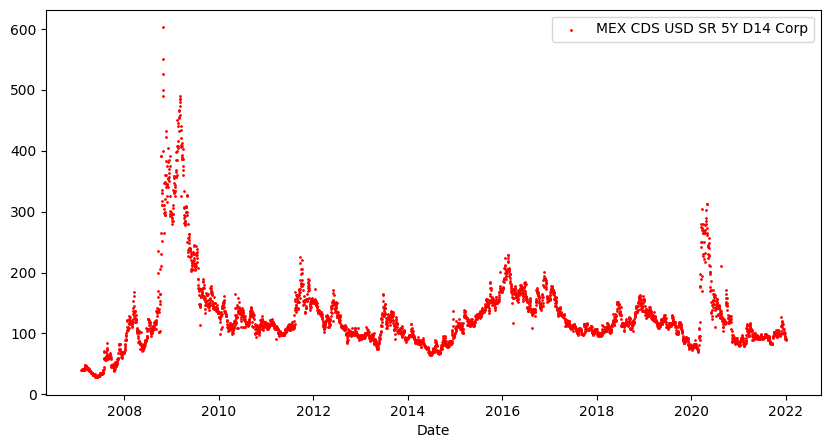

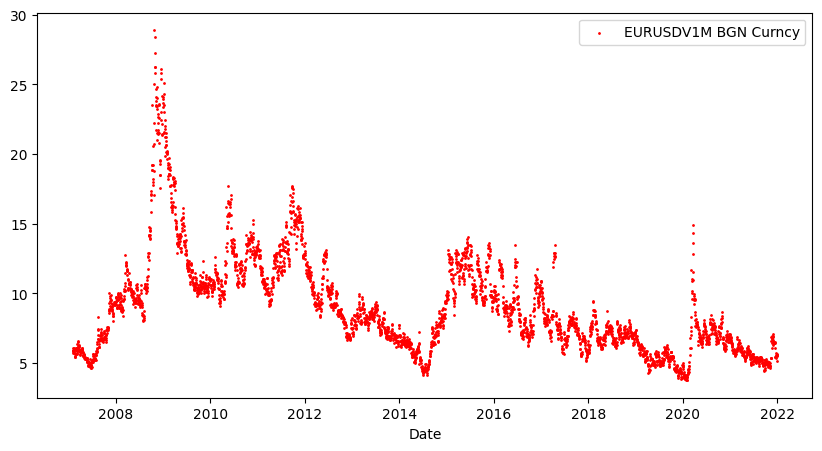

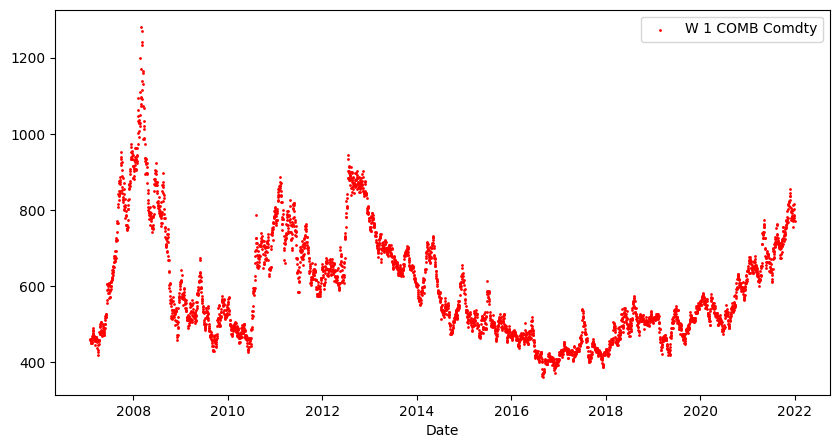

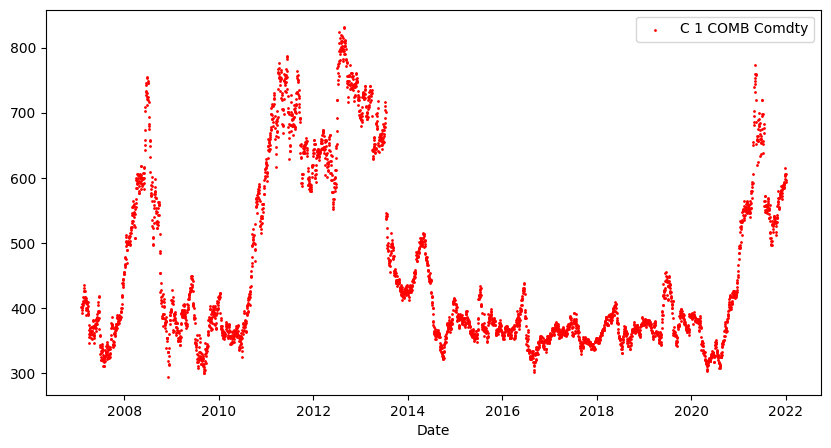

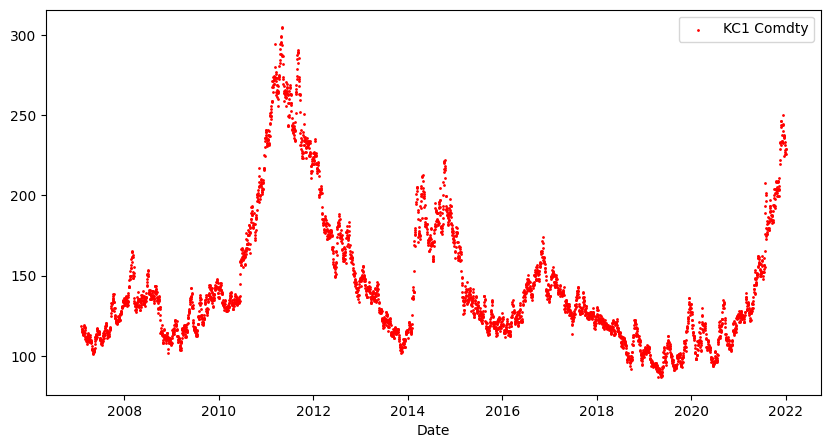

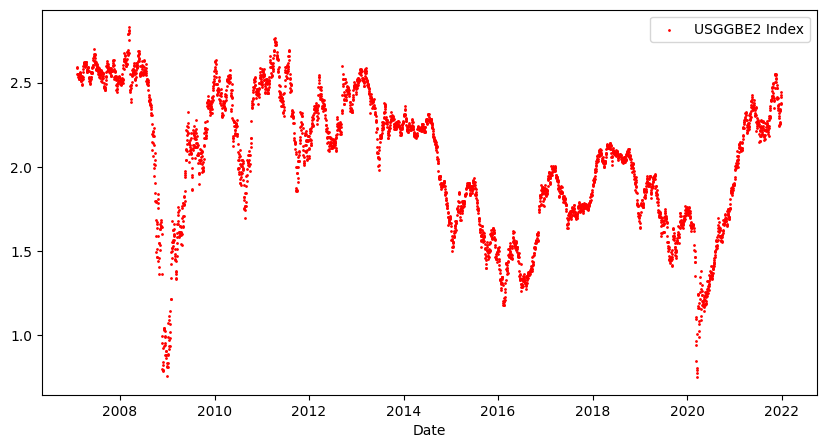

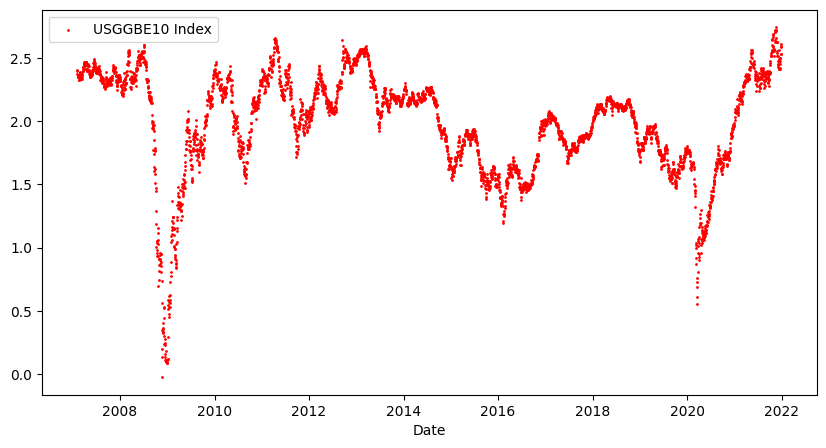

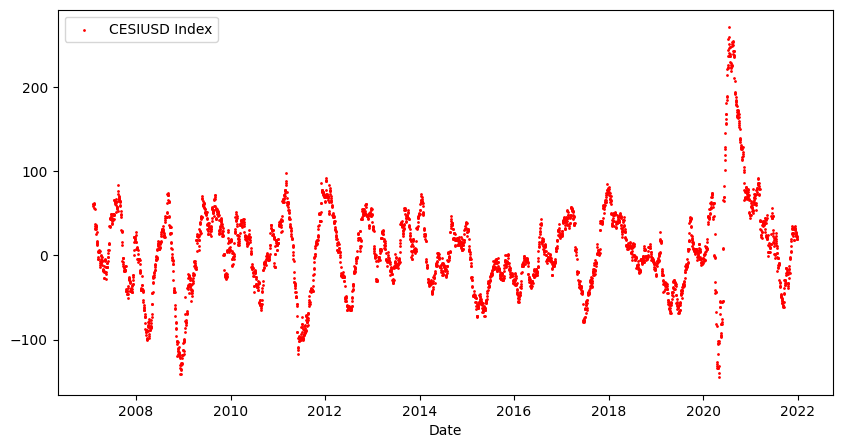

In [10]:
# построение графиков разпределения признаков для различных классов

# Перебор столбцов и построение графиков
for column in t_data.columns:
    if column not in ['Date']:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
        axes.scatter(
        x=t_data['Date'],
        y=t_data[column],
        s=1,
        marker='o',
        c = 'red',
        label=column
        );

    
                # Настройка осей и заголовка
        plt.xlabel('Date')
        #axes[0].set_ylabel(column)
        #axes[1].set_ylabel(column)
            
        # Добавление легенды
        axes.legend()
                
                    # Отображение графика
        plt.show()

In [11]:
#преобразование даты в секунды

# Преобразование datetime в секунды
t_data['Date'] = t_data['Date'].apply(lambda x: x.timestamp())

In [12]:
t_data=t_data.reset_index()

In [13]:
t_data=t_data.drop('index', axis=1)

In [14]:
t_data

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,1.170374e+09,-0.002095,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,54240.0,...,84.960,93.119,39.825,5.9750,461.25,402.00,118.35,2.5953,2.4049,58.5
1,1.170634e+09,0.004990,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,52360.0,...,85.080,93.125,39.500,5.7500,458.50,402.00,116.60,2.5875,2.3990,61.3
2,1.170720e+09,0.003296,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,52570.0,...,84.770,91.151,39.510,5.8500,451.00,396.50,116.50,2.5513,2.3695,60.4
3,1.170806e+09,-0.003404,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,53540.0,...,84.710,90.119,39.396,5.8500,452.00,392.25,116.85,2.5488,2.3596,60.4
4,1.170893e+09,-0.000435,1.3042,1.9589,121.03,10.9502,5.1472,5.0974,59.03,52950.0,...,84.690,92.613,40.338,5.8750,457.00,399.75,115.55,2.5346,2.3455,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,1.640563e+09,0.007824,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,69630.0,...,96.093,208.000,91.500,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3751,1.640650e+09,0.000589,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,70220.0,...,96.202,206.000,92.500,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3752,1.640736e+09,-0.011917,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,70050.0,...,95.929,207.000,91.500,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0
3753,1.640822e+09,0.021418,1.1325,1.3499,115.08,20.4626,0.7307,1.3177,79.32,69920.0,...,95.968,205.000,90.500,5.4900,779.75,596.00,228.85,2.4431,2.6129,20.0


In [15]:
#разбиение данных
column_indices = {name: i for i, name in enumerate(t_data.columns)}

n = len(t_data)
train_df = t_data[0:int(n*0.6)]
val_df = t_data[int(n*0.6):int(n*0.8)]
test_df = t_data[int(n*0.8):]



In [16]:
t_data

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,1.170374e+09,-0.002095,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,54240.0,...,84.960,93.119,39.825,5.9750,461.25,402.00,118.35,2.5953,2.4049,58.5
1,1.170634e+09,0.004990,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,52360.0,...,85.080,93.125,39.500,5.7500,458.50,402.00,116.60,2.5875,2.3990,61.3
2,1.170720e+09,0.003296,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,52570.0,...,84.770,91.151,39.510,5.8500,451.00,396.50,116.50,2.5513,2.3695,60.4
3,1.170806e+09,-0.003404,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,53540.0,...,84.710,90.119,39.396,5.8500,452.00,392.25,116.85,2.5488,2.3596,60.4
4,1.170893e+09,-0.000435,1.3042,1.9589,121.03,10.9502,5.1472,5.0974,59.03,52950.0,...,84.690,92.613,40.338,5.8750,457.00,399.75,115.55,2.5346,2.3455,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,1.640563e+09,0.007824,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,69630.0,...,96.093,208.000,91.500,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3751,1.640650e+09,0.000589,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,70220.0,...,96.202,206.000,92.500,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3752,1.640736e+09,-0.011917,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,70050.0,...,95.929,207.000,91.500,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0
3753,1.640822e+09,0.021418,1.1325,1.3499,115.08,20.4626,0.7307,1.3177,79.32,69920.0,...,95.968,205.000,90.500,5.4900,779.75,596.00,228.85,2.4431,2.6129,20.0


In [17]:
#нормализация данных
#приведение таргета к диапазону от -5 до 5
#надо сделать для всех за исключением data
train_mean = train_df.mean()
train_std = train_df.std()

for column in t_data.columns:
    if column not in ['Date']:
        train_df[column] = (train_df[column] - train_df[column].mean()) / train_df[column].std()
        val_df[column] = (val_df[column] - train_df[column].mean()) / train_df[column].std()
        test_df[column] = (test_df[column] - train_df[column].mean()) / train_df[column].std()
train_df['target']=(train_df['target']-train_df['target'].min())*(10/(train_df['target'].max()-train_df['target'].min()))-5
val_df['target']=(val_df['target']-val_df['target'].min())*(10/(val_df['target'].max()-val_df['target'].min()))-5        
test_df['target']=(test_df['target']-test_df['target'].min())*(10/(test_df['target'].max()-test_df['target'].min()))-5

C:\Users\USER\AppData\Local\Temp\ipykernel_19468\2509869897.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['target']=(train_df['target']-train_df['target'].min())*(10/(train_df['target'].max()-train_df['target'].min()))-5
C:\Users\USER\AppData\Local\Temp\ipykernel_19468\2509869897.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['target']=(val_df['target']-val_df['target'].min())*(10/(val_df['target'].max()-val_df['target'].min()))-5
C:\Users\USER\AppData\Local\Temp\ipykernel_19468

In [18]:
#создание класса окна
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [19]:
#сплит с учетом 
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [20]:
def plot(self, model=None, plot_col='target', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('days')

WindowGenerator.plot = plot

In [21]:
# создание tf.data.Dataset
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=20,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [22]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [23]:
#Одноступенчатые модели

In [24]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['target'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['target']

In [25]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (20, 1, 26)
Labels shape (batch, time, features): (20, 1, 1)


In [26]:
#базовый прогноз, озвращает текущую цену в качестве прогноза, прогнозируя «без изменений»
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]


In [27]:
baseline = Baseline(label_index=column_indices['target'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)


38/38 [==============================] - 0s 2ms/step - loss: 1.4373 - mean_absolute_error: 0.8903


In [28]:
wide_window = WindowGenerator(
    input_width=50, label_width=50, shift=1,
    label_columns=['target'])

wide_window

Total window size: 51
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
Label column name(s): ['target']

In [29]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 50, 26)
Output shape: (20, 50, 1)


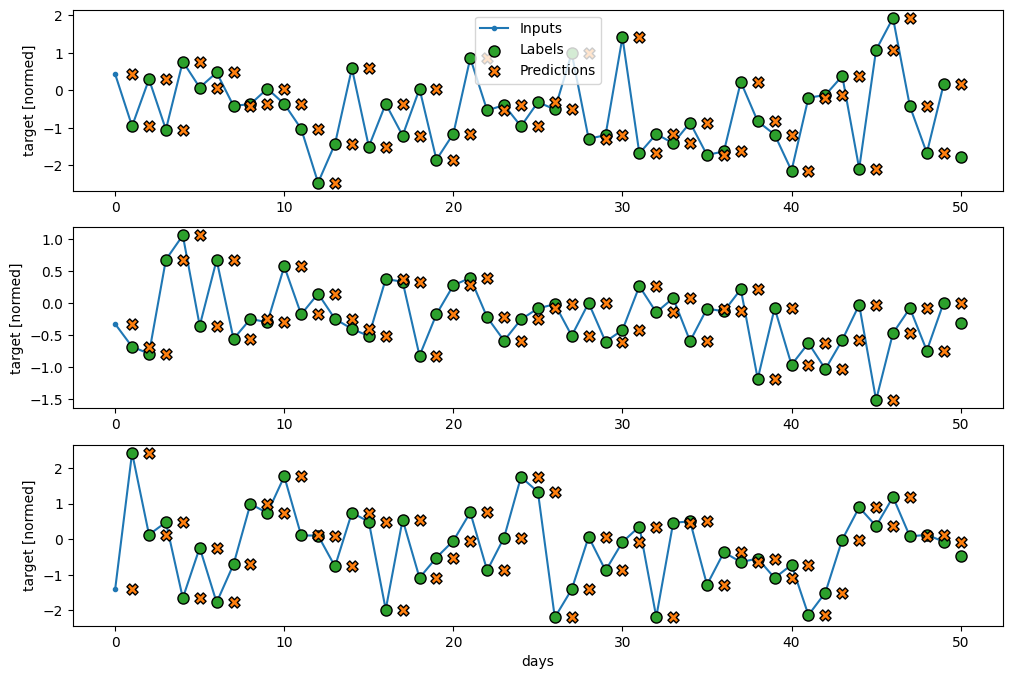

In [30]:
wide_window.plot(baseline)
#это просто метки, сдвинутые вправо на один день
    #Синяя линия Inputs показывает входную температуру на каждом временном шаге. Модель получает все функции, этот график показывает только температуру.
    #Зеленые точки Labels показывают целевое значение прогноза. Эти точки отображаются во время прогнозирования, а не во время ввода. Поэтому диапазон меток смещен на 1 шаг относительно входов.
    #Оранжевые кресты Predictions — это прогнозы модели для каждого выходного временного шага. Если бы модель предсказывала идеально, прогнозы попадали бы прямо в Labels .

In [31]:
# линейная модель
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])


In [32]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)


Input shape: (20, 1, 26)
Output shape: (20, 1, 1)


In [33]:
MAX_EPOCHS = 10

def compile_and_fit(model, window, patience=10):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [34]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)


Epoch 1/10
113/113 [==============================] - 1s 4ms/step - loss: 296541240948686848.0000 - mean_absolute_error: 541926976.0000 - val_loss: 291658825205809152.0000 - val_mean_absolute_error: 539965056.0000
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 170121541470650368.0000 - mean_absolute_error: 410095264.0000 - val_loss: 160456902981976064.0000 - val_mean_absolute_error: 400504576.0000
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 90271098641317888.0000 - mean_absolute_error: 298408864.0000 - val_loss: 81168070076268544.0000 - val_mean_absolute_error: 284853088.0000
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 43847355484602368.0000 - mean_absolute_error: 207661744.0000 - val_loss: 37318743201677312.0000 - val_mean_absolute_error: 193148768.0000
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 19288341644050432.0000 - mean_absolute_error: 137486544.0000 - val_loss: 1

In [35]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 50, 26)
Output shape: (20, 50, 1)


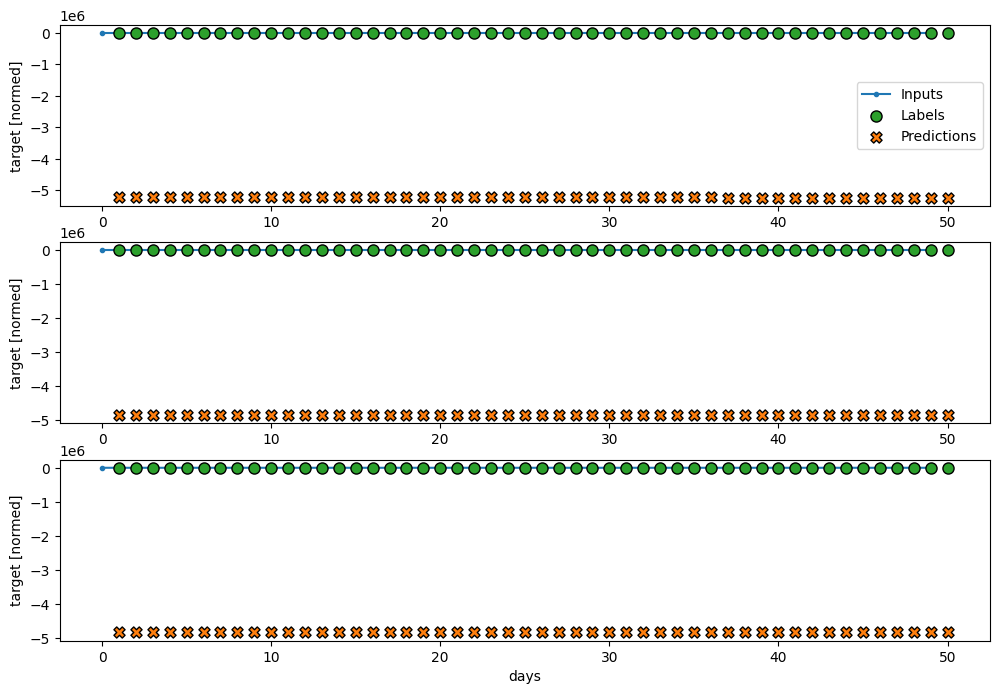

In [36]:
wide_window.plot(linear)


In [57]:
test_df

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
3004,1.546560e+09,1.882478,1.1395,1.2723,108.51,19.4172,2.3432,2.3509,57.06,46830.0,...,96.179,191.5,144.5,6.8600,517.00,383.00,101.60,1.7126,1.7610,-11.6
3005,1.546819e+09,-0.403119,1.1474,1.2777,108.72,19.3619,2.3902,2.3798,57.33,47380.0,...,95.666,183.5,135.5,6.8125,516.75,382.25,102.75,1.7336,1.7807,-12.1
3006,1.546906e+09,0.951641,1.1441,1.2717,108.75,19.3524,2.4392,2.4130,58.72,47350.0,...,95.903,187.5,138.5,6.7600,517.75,380.00,105.05,1.7746,1.8210,-9.0
3007,1.546992e+09,1.497082,1.1543,1.2789,108.17,19.2238,2.4112,2.3899,61.44,47600.0,...,95.219,179.0,131.0,6.9775,520.00,382.00,105.30,1.7816,1.8258,-8.5
3008,1.547078e+09,-0.932858,1.1500,1.2747,108.43,19.1270,2.4302,2.4139,61.68,47460.0,...,95.539,181.5,135.5,6.6150,513.75,376.25,104.25,1.7740,1.8170,-6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,1.640563e+09,1.357665,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,69630.0,...,96.093,208.0,91.5,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3751,1.640650e+09,0.343568,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,70220.0,...,96.202,206.0,92.5,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3752,1.640736e+09,-1.409166,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,70050.0,...,95.929,207.0,91.5,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0
3753,1.640822e+09,3.262923,1.1325,1.3499,115.08,20.4626,0.7307,1.3177,79.32,69920.0,...,95.968,205.0,90.5,5.4900,779.75,596.00,228.85,2.4431,2.6129,20.0


In [58]:
target_ln=linear.predict(test_df)

24/24 [==============================] - 0s 1ms/step


In [59]:

df_ln = test_df.iloc[:, :2]


In [60]:
df_ln['Date'] = pd.to_datetime(df_ln['Date'], unit='s') 

In [61]:
df_ln['target_ln']=target_ln
df_ln

,Date,target,target_ln
3004,2019-01-04,1.882478,-37595.363281
3005,2019-01-07,-0.403119,-37567.902344
3006,2019-01-08,0.951641,-37718.777344
3007,2019-01-09,1.497082,-38323.089844
3008,2019-01-10,-0.932858,-38400.046875
...,...,...,...
3750,2021-12-27,1.357665,-47343.101562
3751,2021-12-28,0.343568,-47048.746094
3752,2021-12-29,-1.409166,-46773.054688
3753,2021-12-30,3.262923,-47012.261719


In [62]:
val_df

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
2253,1.451952e+09,1.551509,1.0748,1.4675,119.06,17.3371,0.8922,1.8123,36.42,36330.0,...,99.404,505.000,175.000,10.1575,461.25,353.00,123.00,1.5213,1.5841,-34.8
2254,1.452038e+09,0.512712,1.0781,1.4630,118.47,17.5383,0.8457,1.7494,34.23,36450.0,...,99.181,482.314,172.355,10.1300,462.75,353.25,119.95,1.5026,1.5576,-29.3
2255,1.452125e+09,0.639296,1.0932,1.4618,117.67,17.8464,0.8032,1.7183,33.75,36380.0,...,98.219,477.829,176.045,10.5625,468.50,353.00,118.45,1.4557,1.5192,-29.8
2256,1.452211e+09,1.325259,1.0922,1.4517,117.26,17.9354,0.7802,1.6580,33.55,35940.0,...,98.540,490.000,186.000,10.2050,478.50,357.00,119.00,1.4397,1.5026,-21.3
2257,1.452470e+09,0.367097,1.0859,1.4543,117.76,17.8840,0.7827,1.7032,31.55,35510.0,...,98.725,497.500,190.000,10.5200,469.00,351.75,114.45,1.4195,1.4809,-22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,1.545869e+09,2.061990,1.1430,1.2644,111.01,19.6759,2.4166,2.4606,52.16,48400.0,...,96.481,211.000,156.500,7.0875,510.50,374.50,101.75,1.7044,1.7581,-17.5
3000,1.545955e+09,0.972850,1.1444,1.2699,110.27,19.6587,2.3822,2.4167,52.20,48190.0,...,96.402,206.000,155.500,7.2625,511.50,375.50,100.95,1.6800,1.7320,-17.9
3001,1.546214e+09,1.035315,1.1467,1.2754,109.69,19.6504,2.3852,2.3823,53.80,48190.0,...,96.173,207.519,154.732,7.2175,503.25,375.00,101.85,1.6646,1.7139,-23.8
3002,1.546387e+09,2.815397,1.1344,1.2607,108.88,19.5712,2.3522,2.3226,54.91,47870.0,...,96.819,207.000,155.500,7.4025,506.75,375.75,99.50,1.6442,1.6886,-22.5


In [63]:
# плотный слой

In [64]:
CONV_WIDTH = 7
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['target'])

conv_window


Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['target']

Text(0.5, 1.0, 'Given 3 days of inputs, predict 1 day into the future.')

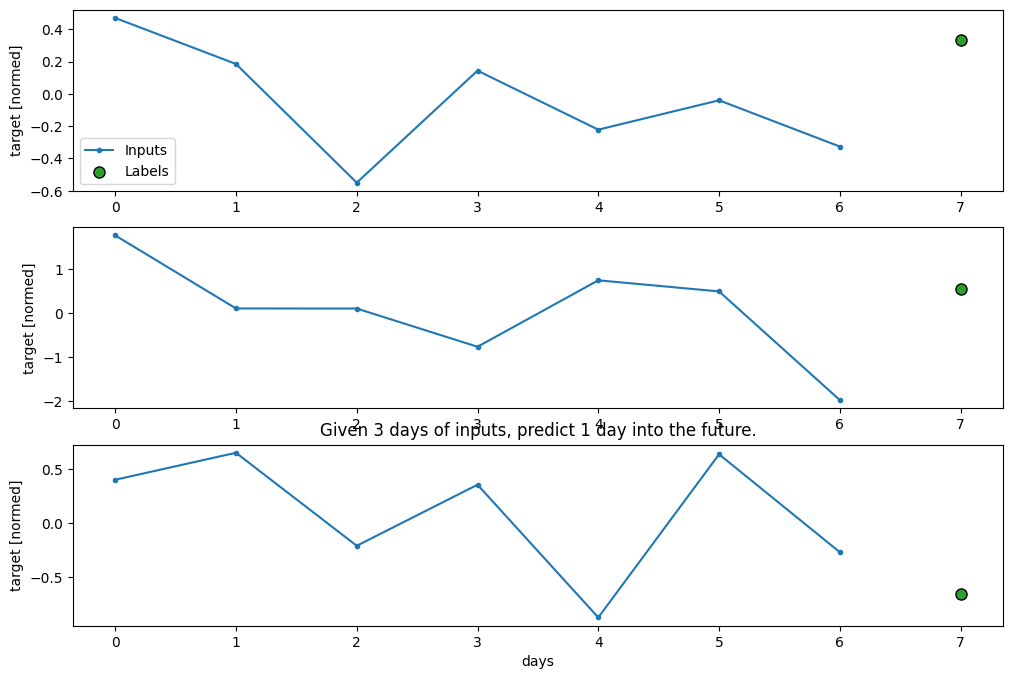

In [65]:
conv_window.plot()
plt.title("Given 3 days of inputs, predict 1 day into the future.")

In [66]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])


In [67]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)


Input shape: (20, 7, 26)
Output shape: (20, 1, 1)


In [68]:
history = compile_and_fit(multi_step_dense, conv_window)

val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)


Epoch 1/10
113/113 [==============================] - 1s 5ms/step - loss: 1478141985947648.0000 - mean_absolute_error: 18183178.0000 - val_loss: 28204259328.0000 - val_mean_absolute_error: 167851.1875
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 7423470592.0000 - mean_absolute_error: 47479.3438 - val_loss: 689759296.0000 - val_mean_absolute_error: 25219.9199
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 21924518.0000 - mean_absolute_error: 3757.3860 - val_loss: 624408128.0000 - val_mean_absolute_error: 23894.8555
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 22736364.0000 - mean_absolute_error: 3797.3401 - val_loss: 643042368.0000 - val_mean_absolute_error: 24280.0020
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 22158584.0000 - mean_absolute_error: 3752.0391 - val_loss: 598323200.0000 - val_mean_absolute_error: 23345.1914
Epoch 6/10
 95/113 [========================>.....] 

KeyboardInterrupt: 

In [ ]:
from IPython.display import clear_output

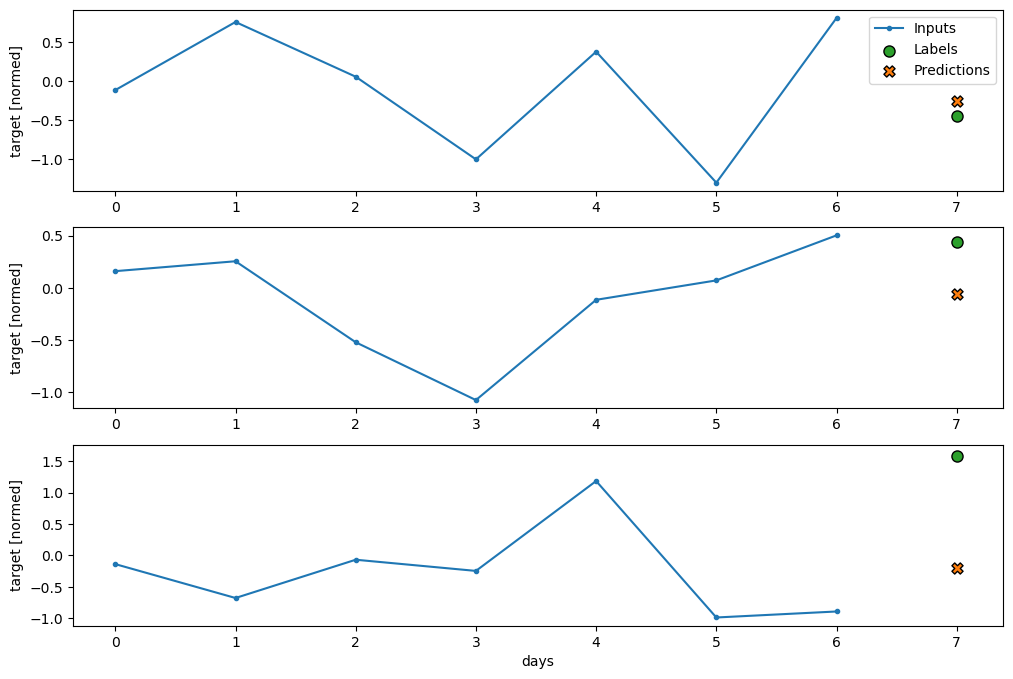

In [ ]:
conv_window.plot(multi_step_dense)


In [ ]:
#сверточная нейронная сеть
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=20,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=1),
])


In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)


Conv model on `conv_window`
Input shape: (20, 7, 26)
Output shape: (20, 1, 1)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

#IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)


Epoch 1/30
132/132 [==============================] - 1s 2ms/step - loss: 0.6242 - mean_absolute_error: 0.5618 - val_loss: 1.5867 - val_mean_absolute_error: 0.9814
Epoch 2/30
132/132 [==============================] - 0s 2ms/step - loss: 0.6009 - mean_absolute_error: 0.5482 - val_loss: 1.7042 - val_mean_absolute_error: 1.0322
Epoch 3/30
132/132 [==============================] - 0s 1ms/step - loss: 0.5884 - mean_absolute_error: 0.5425 - val_loss: 1.6572 - val_mean_absolute_error: 1.0059
Epoch 4/30
132/132 [==============================] - 2s 13ms/step - loss: 0.5821 - mean_absolute_error: 0.5387 - val_loss: 1.4384 - val_mean_absolute_error: 0.9114
Epoch 5/30
132/132 [==============================] - 0s 1ms/step - loss: 0.5831 - mean_absolute_error: 0.5385 - val_loss: 1.7397 - val_mean_absolute_error: 1.0299
Epoch 6/30
132/132 [==============================] - 0s 1ms/step - loss: 0.5824 - mean_absolute_error: 0.5393 - val_loss: 1.8048 - val_mean_absolute_error: 1.0529
Epoch 7/30
132/

In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)


Wide window
Input shape: (20, 50, 26)
Labels shape: (20, 50, 1)
Output shape: (20, 44, 1)


In [ ]:
LABEL_WIDTH = 50
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['target'])

wide_conv_window

Total window size: 57
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
Label indices: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56]
Label column name(s): ['target']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)


Wide conv window
Input shape: (20, 56, 26)
Labels shape: (20, 50, 1)
Output shape: (20, 50, 1)


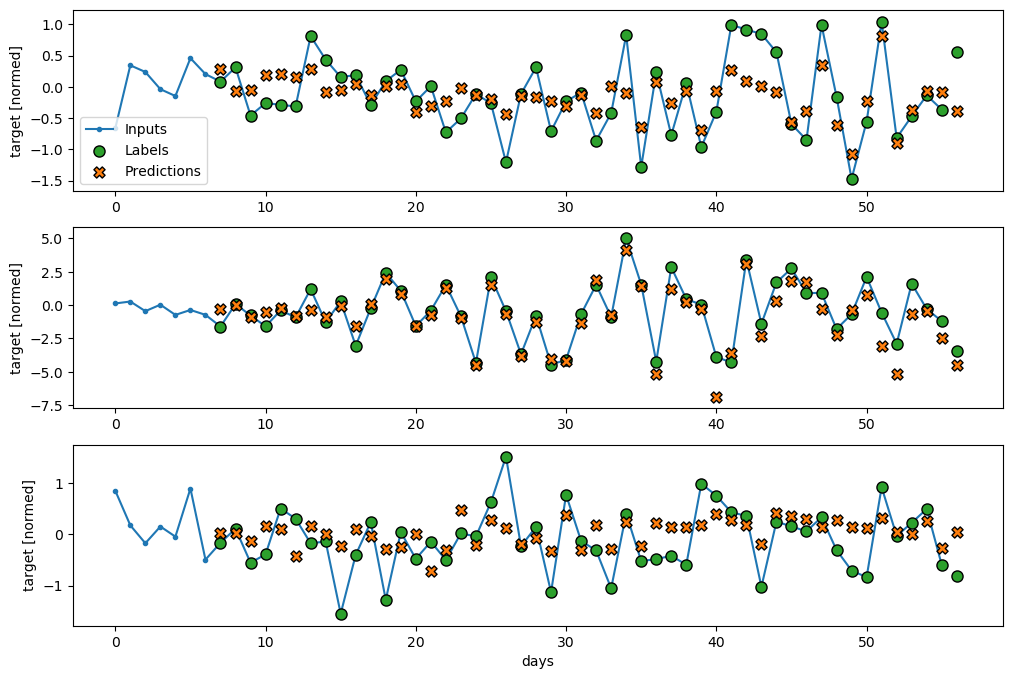

In [ ]:
wide_conv_window.plot(conv_model)


In [ ]:
#рекуррентная нейронная сеть lstm
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(20, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])


In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)


Input shape: (20, 50, 26)
Output shape: (20, 50, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

#IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)


Epoch 1/30
129/129 [==============================] - 3s 12ms/step - loss: 0.5672 - mean_absolute_error: 0.5342 - val_loss: 1.6837 - val_mean_absolute_error: 1.0017
Epoch 2/30
129/129 [==============================] - 1s 10ms/step - loss: 0.5312 - mean_absolute_error: 0.5181 - val_loss: 1.9101 - val_mean_absolute_error: 1.0679
Epoch 3/30
129/129 [==============================] - 1s 10ms/step - loss: 0.5078 - mean_absolute_error: 0.5084 - val_loss: 1.8690 - val_mean_absolute_error: 1.0372
Epoch 4/30
129/129 [==============================] - 1s 10ms/step - loss: 0.4895 - mean_absolute_error: 0.5016 - val_loss: 1.8912 - val_mean_absolute_error: 1.0356
Epoch 5/30
129/129 [==============================] - 1s 11ms/step - loss: 0.4724 - mean_absolute_error: 0.4950 - val_loss: 1.9184 - val_mean_absolute_error: 1.0362
Epoch 6/30
129/129 [==============================] - 2s 12ms/step - loss: 0.4632 - mean_absolute_error: 0.4921 - val_loss: 1.9213 - val_mean_absolute_error: 1.0379
Epoch 7/30

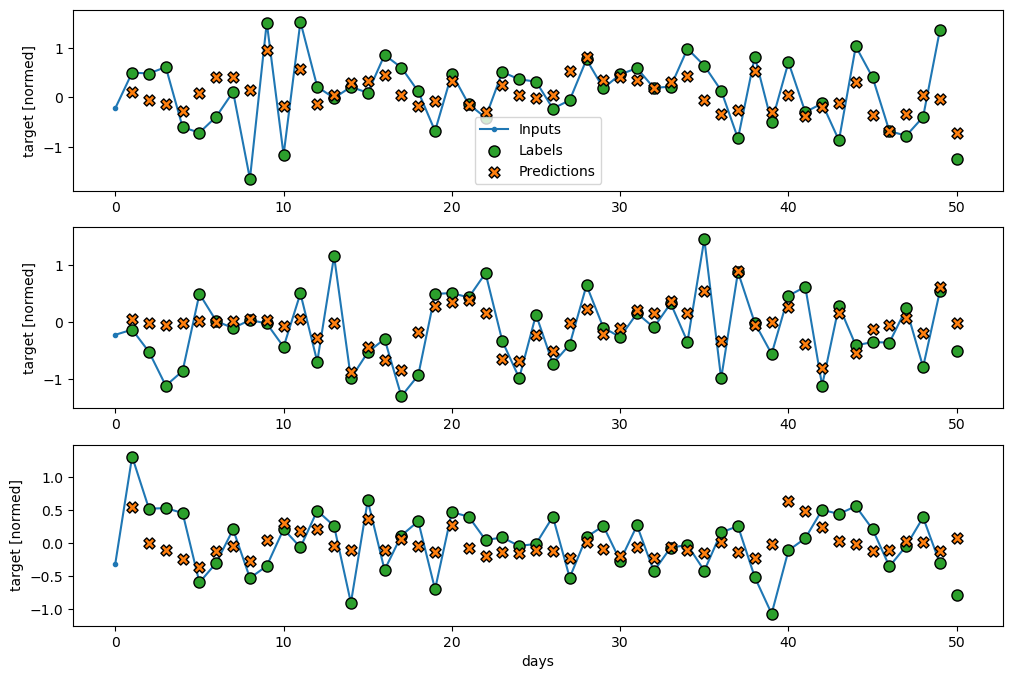

In [ ]:
wide_window.plot(lstm_model)


In [ ]:
#Performance

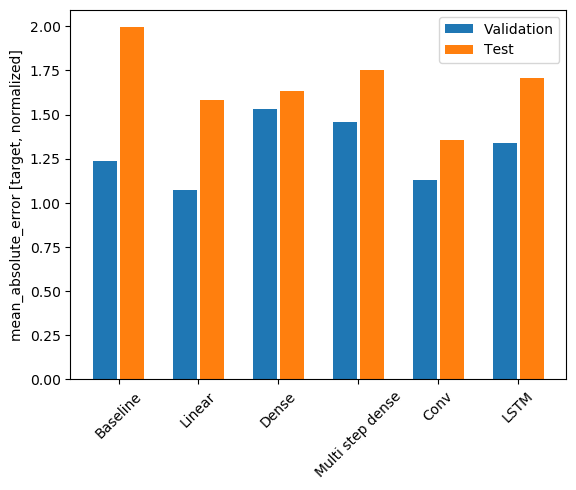

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [target, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()


In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')


Baseline    : 1.9934
Linear      : 1.5796
Dense       : 1.6357
Multi step dense: 1.7526
Conv        : 1.3547
LSTM        : 1.7076
